<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-даты" data-toc-modified-id="Подготовка-даты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка даты</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#ROI" data-toc-modified-id="ROI-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ROI</a></span></li><li><span><a href="#Retation-rate-и-ARPU" data-toc-modified-id="Retation-rate-и-ARPU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Retation rate и ARPU</a></span></li><li><span><a href="#CPI-по-компаниям" data-toc-modified-id="CPI-по-компаниям-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CPI по компаниям</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

## Подготовка даты

In [2]:
registrations = pd.read_csv('C:/DS/test_aigrid/registrations.csv',index_col=0)
payments = pd.read_csv('C:/DS/test_aigrid/payments.csv')
persents = pd.read_csv('C:/DS/test_aigrid/persents.csv',index_col=0)
budget = pd.read_excel('C:/DS/test_aigrid/Рекламный бюджет январь 2021.xlsx')

In [3]:
def status_data(data, name="DataFrame"):
   
    print(f"\n=== Анализ DataFrame: {name} ===\n")
    
    print("📊 Первые 5 строк таблицы:")
    display(data.head())
    
    print("\n🔍 Общая информация о датасете:")
    data_info = data.info()
    print("-" * 40)
    
    print("\n❓ Пропущенные значения (по столбцам):")
    missing_values = data.isna().sum()
    display(missing_values[missing_values > 0])
    if missing_values.sum() == 0:
        print("Пропущенных значений нет.")
    
    print("\n🔄 Количество дубликатов в данных:", data.duplicated().sum())
    print("-" * 40)
    
    print("\n📈 Статистическое описание:")
    display(data.describe())
    print("-" * 40)

In [4]:
status_data(registrations,name='Регистрации')
status_data(payments,name='Платежи')
status_data(persents,name='Комиссии платежных систем')
status_data(budget,name='Рекламный бюджет')


=== Анализ DataFrame: Регистрации ===

📊 Первые 5 строк таблицы:


,account_id,created_date,campaign
0,3842380.0,2021-01-01,BRA_MS1_install
1,3842381.0,2021-01-01,NaN
2,3842382.0,2021-01-01,NaN
3,3842383.0,2021-01-01,NaN
4,3842384.0,2021-01-01,BRA_MS1_install



🔍 Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 89144 entries, 0 to 89143
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   account_id    89141 non-null  float64
 1   created_date  89144 non-null  object 
 2   campaign      36283 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.7+ MB
----------------------------------------

❓ Пропущенные значения (по столбцам):


account_id        3
campaign      52861
dtype: int64


🔄 Количество дубликатов в данных: 0
----------------------------------------

📈 Статистическое описание:


,account_id
count,8.914100e+04
mean,3.886951e+06
std,2.573417e+04
min,3.842380e+06
25%,3.864665e+06
50%,3.886950e+06
75%,3.909237e+06
max,3.931524e+06


----------------------------------------

=== Анализ DataFrame: Платежи ===

📊 Первые 5 строк таблицы:


,payment_date,Payment_types,real_cost,account_id
0,2021-01-01 00:00:56,Payment_system_5,9.650000,2907221
1,2021-01-01 00:01:48,Payment_system_5,0.955872,3228373
2,2021-01-01 00:03:42,Payment_system_5,3.026930,318552
3,2021-01-01 00:04:27,Payment_system_2,99.990000,3832817
4,2021-01-01 00:06:41,Payment_system_5,1.432550,7229767



🔍 Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303614 entries, 0 to 303613
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   payment_date   303614 non-null  object 
 1   Payment_types  303614 non-null  object 
 2   real_cost      303614 non-null  float64
 3   account_id     303614 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 9.3+ MB
----------------------------------------

❓ Пропущенные значения (по столбцам):


Series([], dtype: int64)

Пропущенных значений нет.

🔄 Количество дубликатов в данных: 4
----------------------------------------

📈 Статистическое описание:


,real_cost,account_id
count,303614.000000,3.036140e+05
mean,11.692197,4.063361e+06
std,17.025220,2.587446e+06
min,0.000000,2.400000e+01
25%,1.099680,2.162915e+06
50%,4.763710,3.755245e+06
75%,11.274100,4.873233e+06
max,261.640000,9.999944e+06


----------------------------------------

=== Анализ DataFrame: Комиссии платежных систем ===

📊 Первые 5 строк таблицы:


,Payment_types,"Share, %"
0,Payment_system_1,20.7
1,Payment_system_2,15.0
2,Payment_system_3,58.5
3,Payment_system_4,0.0
4,Payment_system_5,24.0



🔍 Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Payment_types  5 non-null      object 
 1   Share, %       5 non-null      float64
dtypes: float64(1), object(1)
memory usage: 120.0+ bytes
----------------------------------------

❓ Пропущенные значения (по столбцам):


Series([], dtype: int64)

Пропущенных значений нет.

🔄 Количество дубликатов в данных: 0
----------------------------------------

📈 Статистическое описание:


,"Share, %"
count,5.000000
mean,23.640000
std,21.549316
min,0.000000
25%,15.000000
50%,20.700000
75%,24.000000
max,58.500000


----------------------------------------

=== Анализ DataFrame: Рекламный бюджет ===

📊 Первые 5 строк таблицы:


,media_source,Campaign_type,Target,"Plan, USD",Installs,"Spend, USD","Deviation, USD"
0,Media_source_1,install,Brazil,100,10460,99.12,0.88
1,NaN,purchase,Brazil,400,1081,398.67,1.33
2,NaN,install,Russia,200,11894,246.30,-46.30
3,NaN,purchase,Russia,500,1441,616.77,-116.77
4,NaN,install,Ukrane,100,6424,99.43,0.57



🔍 Общая информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   media_source    3 non-null      object 
 1   Campaign_type   8 non-null      object 
 2   Target          8 non-null      object 
 3   Plan, USD       9 non-null      int64  
 4   Installs        9 non-null      int64  
 5   Spend, USD      9 non-null      float64
 6   Deviation, USD  9 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 632.0+ bytes
----------------------------------------

❓ Пропущенные значения (по столбцам):


media_source     6
Campaign_type    1
Target           1
dtype: int64


🔄 Количество дубликатов в данных: 0
----------------------------------------

📈 Статистическое описание:


,"Plan, USD",Installs,"Spend, USD","Deviation, USD"
count,9.000000,9.000000,9.000000,9.000000
mean,444.444444,7125.555556,442.115556,2.328889
std,608.504542,10409.210526,607.914670,70.055897
min,100.000000,152.000000,81.150000,-116.770000
25%,100.000000,371.000000,99.430000,0.050000
50%,200.000000,1441.000000,246.300000,0.880000
75%,500.000000,10460.000000,398.670000,10.480000
max,2000.000000,32065.000000,1989.520000,151.870000


----------------------------------------


In [5]:
budget['media_source'] = budget['media_source'].fillna(method='ffill')
budget = budget[budget['media_source'] != 'Total']

In [6]:
registrations.isnull().sum().sort_values(ascending = False) / registrations.shape[0] * 100

campaign        59.298438
account_id       0.003365
created_date     0.000000
dtype: float64

In [7]:
registrations['campaign'].unique()

array(['BRA_MS1_install', nan, 'RUS_MS1_install', 'UKR_MS1_install',
       'BRA_MS1_purchase', 'RUS_MS1_purchase', 'PR_youtube_bloger',
       'UKR_MS1_purchase', 'ENG_MS2_install', 'BRA_MS2_install', 'our_fb'],
      dtype=object)

In [8]:
registrations[registrations['campaign'].isna()]['created_date'].value_counts()

2021-01-16    2236
2021-01-15    2036
2021-01-02    1946
2021-01-09    1946
2021-01-17    1910
2021-01-03    1902
2021-01-10    1887
2021-01-04    1822
2021-01-11    1818
2021-01-01    1817
2021-01-12    1778
2021-01-24    1768
2021-01-08    1723
2021-01-23    1723
2021-01-19    1691
2021-01-18    1676
2021-01-13    1631
2021-01-21    1629
2021-01-07    1629
2021-01-14    1618
2021-01-31    1617
2021-01-20    1616
2021-01-06    1615
2021-01-22    1574
2021-01-05    1560
2021-01-30    1530
2021-01-25    1523
2021-01-26    1459
2021-01-28    1400
2021-01-29    1395
2021-01-27    1386
Name: created_date, dtype: int64

**Пропуски в 'campaign' распределены нормально, что не может быть причиной в технической части. Т.к нет информации о наличии в этой выгрузки данных только с рекламных источник, то предположим что это органика и уберем эти данные.**

**Почему-то в этих каналах отображается трафик с PR_youtube_bloger, который не указан в бюджете на рекламу, его тоже убираем**

In [9]:
#исправления форматов, удаление дубликатов, приведение даты к одному виду

payments= payments.drop_duplicates()
registrations = registrations.dropna(subset=['account_id'])
registrations = registrations.dropna(subset=['campaign'])
registrations.drop(registrations[registrations['campaign'] == 'PR_youtube_bloger'].index, inplace=True)

payments.columns = payments.columns.str.lower()
persents.columns = persents.columns.str.lower()
budget.columns = budget.columns.str.lower()

registrations['created_date'] = pd.to_datetime(registrations['created_date'])
payments['payment_date'] = pd.to_datetime(payments['payment_date'])

registrations['account_id'] = registrations['account_id'].astype('int64')

In [10]:
budget['full_campaign'] = budget['target'] + '_' + budget['media_source'] + '_' + budget['campaign_type']

In [11]:
#сопосатлю пересечения аккаунтов из оплат и регистраций 
display(f"Кол-во account_id в payments:{len(payments)}")
display(f"Кол-во account_id в registrations:{len(registrations)}")
display(f"Уникальные account_id в payments:{len(payments['account_id'].unique())}")
display(f"Уникальные account_id в registrations:{len(registrations['account_id'].unique())}")


missing_ids = payments[~payments['account_id'].isin(registrations['account_id'])]
display(f"Количество account_id из payments, которых нет в registrations: {len(missing_ids)}")

'Кол-во account_id в payments:303610'

'Кол-во account_id в registrations:34469'

'Уникальные account_id в payments:57382'

'Уникальные account_id в registrations:34469'

'Количество account_id из payments, которых нет в registrations: 302922'

In [12]:
#добавление расчета дохода с учетом комиссии по симтемам оплат
payments = payments.merge(persents,on='payment_types',how="left")
payments['net_revenue'] = payments['real_cost'] * (1 - payments['share, %'] / 100)

In [13]:
user_data = pd.merge(registrations, payments, on='account_id', how='left')

#добавление даты первого платежа
user_data['time_to_first_payment'] = user_data['payment_date'] - user_data['created_date']

## EDA

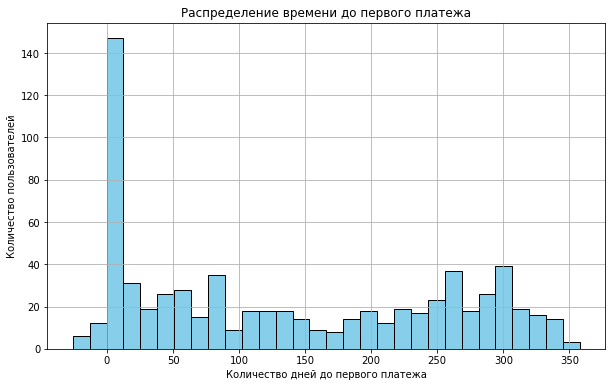

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(user_data['time_to_first_payment'].dt.days.dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение времени до первого платежа')
plt.xlabel('Количество дней до первого платежа')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

In [15]:
df = payments.merge(registrations, on='account_id', how='inner')

In [16]:
# Группируем доход по кампаниям и датам
revenue_by_date = df.groupby(['campaign', 'payment_date'])['net_revenue'].sum().reset_index()

revenue_by_date['cumulative_revenue'] = revenue_by_date.groupby('campaign')['net_revenue'].cumsum()

In [17]:
revenue_by_date[['region', 'ms_type', 'type']] = revenue_by_date['campaign'].str.extract(
    r'([A-Z]+)_[A-Z]+(1|2)_([a-z]+)'
)


In [18]:
revenue_by_date['region'] = revenue_by_date['region'].map({
    'BRA': 'Brazil',
    'RUS': 'Russia',
    'ENG': 'English_speaking',
    'UKR': 'Ukrane'
})
revenue_by_date['type'] = revenue_by_date['type'].map({
    'install': 'install',
    'purchase': 'purchase'
})
revenue_by_date['ms_type'] = revenue_by_date['ms_type'].map({
    '1': 'Media_source_1',
    '2': 'Media_source_2'
})

In [19]:
revenue_by_date['region'].unique()

array(['Brazil', 'English_speaking', 'Russia', 'Ukrane'], dtype=object)

In [20]:
revenue_by_date['type'].unique()

array(['install', 'purchase'], dtype=object)

In [21]:
revenue_by_date['ms_type'].unique()

array(['Media_source_1', 'Media_source_2'], dtype=object)

### ROI

In [22]:
revenue_by_date['full_campaign'] = revenue_by_date['region'] + '_' + revenue_by_date['ms_type'] + '_' + revenue_by_date['type']

In [23]:
merged_data = revenue_by_date.merge(
    budget,
    on= 'full_campaign',
    how='left'
)

In [24]:
merged_data['cumulative_roi'] = merged_data['cumulative_revenue'] / merged_data['spend, usd']

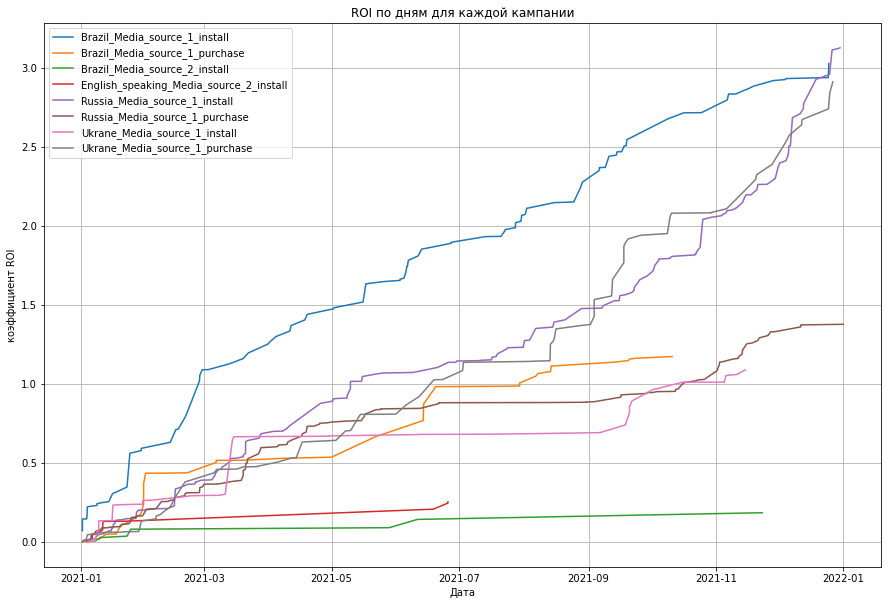

In [25]:
plt.figure(figsize=(15, 10))
for campaign in merged_data['full_campaign'].unique():
    data = merged_data[merged_data['full_campaign'] == campaign]
    plt.plot(data['payment_date'], data['cumulative_roi'], label=campaign)

plt.title('ROI по дням для каждой кампании')
plt.xlabel('Дата')
plt.ylabel('коэффициент ROI')
plt.legend()
plt.grid()
plt.show()


In [26]:
user_data[['region', 'ms_type', 'type']] = user_data['campaign'].str.extract(
    r'([A-Z]+)_[A-Z]+(1|2)_([a-z]+)'
)

user_data['region'] = user_data['region'].map({
    'BRA': 'Brazil',
    'RUS': 'Russia',
    'ENG': 'English_speaking',
    'UKR': 'Ukrane'
})
user_data['type'] = user_data['type'].map({
    'install': 'install',
    'purchase': 'purchase'
})
user_data['ms_type'] = user_data['ms_type'].map({
    '1': 'Media_source_1',
    '2': 'Media_source_2'
})


user_data['full_campaign'] = user_data['region'] + '_' + user_data['ms_type'] + '_' + user_data['type']

user_data = user_data.merge(
    budget,
    on= 'full_campaign',
    how='left'
)

### Retation rate и ARPU

In [27]:
revenue_by_date = revenue_by_date.merge(budget, on='full_campaign', how='left')

In [28]:
# Привязка регистраций к платежам
df_1 = payments.merge(registrations, on="account_id", how = 'inner')

In [29]:
df_1['days_since_registration'] = (df_1['payment_date'] - df_1['created_date']).dt.days

In [30]:
arpu_data = df_1.groupby(['campaign', 'days_since_registration'])['net_revenue'].sum().reset_index()

arpu_data['cumulative_revenue'] = arpu_data.groupby('campaign')['net_revenue'].cumsum()
arpu_data['cumulative_arpu'] = arpu_data['cumulative_revenue'] / registrations['account_id'].nunique()

arpu_summary = arpu_data[arpu_data['days_since_registration'].isin([7, 14, 30])]

In [31]:
retention = df_1[df_1['days_since_registration'].isin([1, 7, 30])].groupby(['campaign', 'days_since_registration'])['account_id'].nunique().reset_index()

#retention
total_users = registrations.groupby('campaign')['account_id'].nunique().reset_index()
retention = retention.merge(total_users, on='campaign', how='left')
retention['retention_rate'] = retention['account_id_x'] / retention['account_id_y'] * 100


In [32]:
retention_pivot = retention.pivot(index='campaign', columns='days_since_registration', values='retention_rate')
retention_pivot = retention_pivot[[1, 7, 30]] 
retention_pivot.columns = ['Day 1', 'Day 7', 'Day 30'] 

<Figure size 864x432 with 0 Axes>

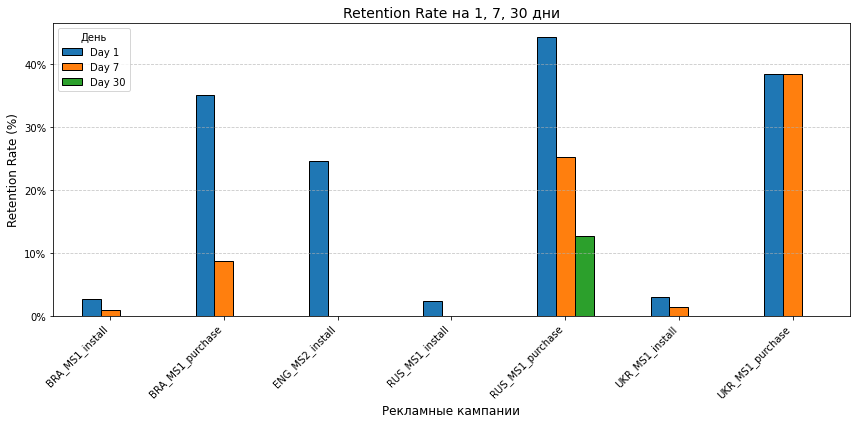

In [33]:
plt.figure(figsize=(12, 6))
retention_pivot.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y * 100:.0f}%'))

plt.title('Retention Rate на 1, 7, 30 дни', fontsize=14)
plt.ylabel('Retention Rate (%)', fontsize=12)
plt.xlabel('Рекламные кампании', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='День', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

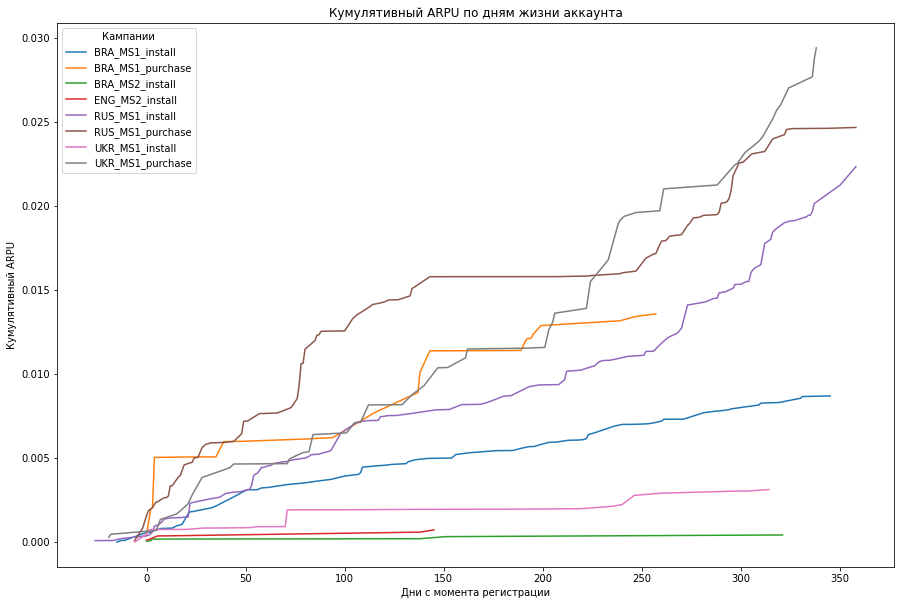

In [34]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=arpu_data, x='days_since_registration', y='cumulative_arpu', hue='campaign')
plt.title("Кумулятивный ARPU по дням жизни аккаунта")
plt.xlabel("Дни с момента регистрации")
plt.ylabel("Кумулятивный ARPU")
plt.legend(title="Кампании")
plt.show()

### CPI по компаниям


Данные с рассчитанным CPI:
     media_source campaign_type            target       cpi
0  Media_source_1       install            Brazil  0.009476
1  Media_source_1      purchase            Brazil  0.368797
2  Media_source_1       install            Russia  0.020708
3  Media_source_1      purchase            Russia  0.428015
4  Media_source_1       install            Ukrane  0.015478
5  Media_source_1      purchase            Ukrane  1.438554
6  Media_source_2       install            Brazil  0.533882
7  Media_source_2       install  English_speaking  0.269407


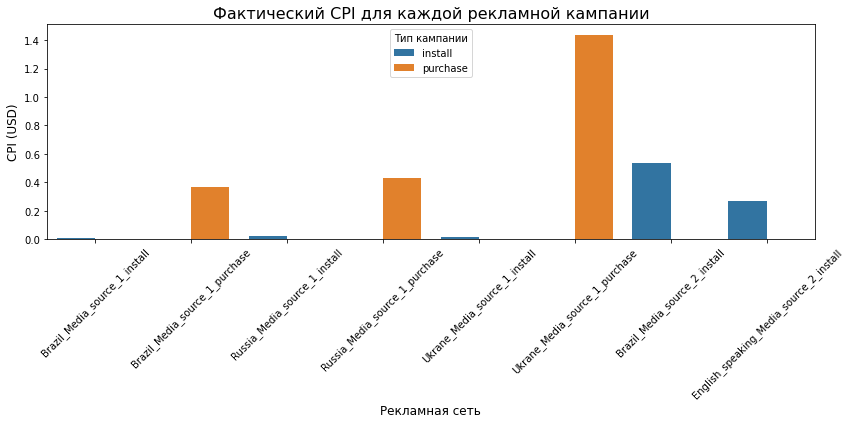

In [35]:
budget['cpi'] = budget['spend, usd'] / budget['installs']

print("\nДанные с рассчитанным CPI:")
print(budget[['media_source', 'campaign_type', 'target', 'cpi']])


plt.figure(figsize=(12, 6))
sns.barplot(data=budget, x='full_campaign', y='cpi', hue='campaign_type', ci=None)
plt.title('Фактический CPI для каждой рекламной кампании', fontsize=16)
plt.xlabel('Рекламная сеть', fontsize=12)
plt.ylabel('CPI (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Тип кампании')
plt.tight_layout()
plt.show()


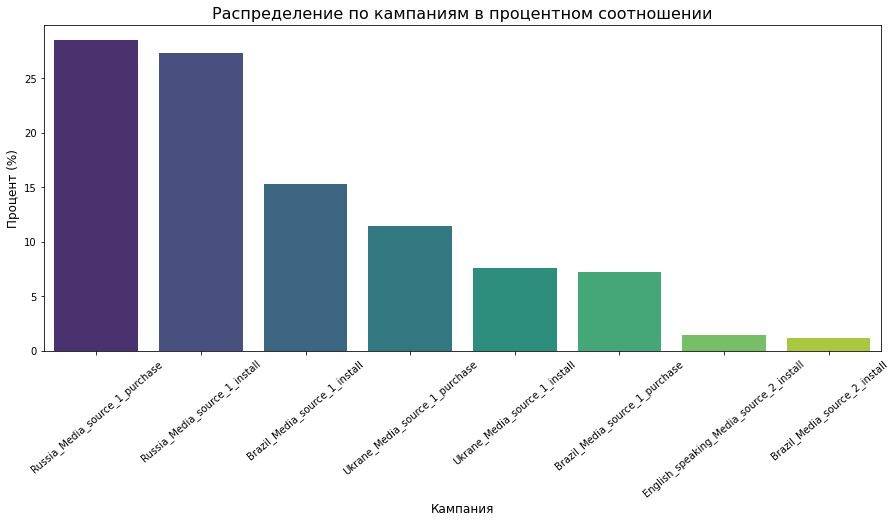

In [36]:
campaign_counts = merged_data['full_campaign'].value_counts(normalize=True) * 100

plt.figure(figsize=(15, 6))
sns.barplot(x=campaign_counts.index, y=campaign_counts.values, palette='viridis')

plt.title('Распределение по кампаниям в процентном соотношении', fontsize=16)
plt.xlabel('Кампания', fontsize=12)
plt.ylabel('Процент (%)', fontsize=12)
plt.xticks(rotation=40) 
plt.show()

## Выводы

**Оптимальный срок оценки окупаемости рекламных кампаний**

На основании анализа графиков кумулятивного ROI и ARPU по дням жизни аккаунта можно определить следующие ключевые моменты:

Кумулятивный ROI стабилизируется или достигает окупаемости в среднем между 30 и 90 днями в зависимости от кампании.
Для прогнозов окупаемости на ранних стадиях целесообразно оценивать показатели на 7-й, 14-й и 30-й дни, так как уже на этих этапах виден темп роста доходности.

**1.Наиболее успешные рекламные кампании**

На графике Retention Rate и ARPU выделяются кампании:

**RUS_MS1_purchase и UKR_MS1_purchase** показывают высокий Retention Rate на 1-й, 7-й и 30-й день, что свидетельствует о высокой удерживаемости пользователей.
**RUS_MS1_purchase и UKR_MS1_purchase** также показывают самый высокий ARPU на длительном промежутке времени, что говорит о высокой доходности пользователей.

Кампании, оптимизированные под покупки, значительно успешнее кампаний, ориентированных на установки, как видно на графике CPI: **У purchase-кампаний выше CPI, но также выше доходность и окупаемость (ROI и ARPU).**

На графике ROI можно увидеть, что Media_source_1 является самой эффективной сетью для кампаний Russia и Ukraine, так как ROI для этих кампаний превышает 1.0 к более ранним срокам. 

Для источника Media_source_2 нет подтвержденных результатов выраженных в исследуемых метриках.

**2.Рассчитанный накопительный ARPU на 7, 14, 30 день жизни аккаунтов**

На графике кумулятивного ARPU можно отметить:

RUS_MS1_purchase и UKR_MS1_purchase показывают уверенный рост ARPU на всех стадиях:
- 7-й день: Быстрый старт накопления доходности.
- 14-й день: Устойчивый рост.
- 30-й день: Доходность пользователей продолжает накапливаться и стабилизируется.

Для прогнозирования окупаемости новых кампаний данные по 7-му и 14-му дням являются ключевыми, так как они демонстрируют раннюю динамику роста.

**3.Фактический CPI для рекламных кампаний**

На графике CPI по рекламным кампаниям можно отметить:

CPI для install-кампаний значительно ниже, чем для purchase-кампаний. Например:
- Brazil (Media_source_1_install): 0.004976 USD
- Russia (Media_source_1_install): 0.020708 USD

CPI для purchase-кампаний выше, но это оправдывается более высокой доходностью:
- Russia (Media_source_1_purchase): 0.428015 USD
- Ukraine (Media_source_1_purchase): 0.138554 USD

**4.Итоговые выводы:**

На основе анализа отчетных данных и графиков, оптимальный срок оценки окупаемости можно предположить - 30 дней

- На графике ROI по дням видно, что ключевые кампании (например, RUS_MS1_purchase и UKR_MS1_purchase) начинают выходить на окупаемость (ROI ≈ 1.0) к 30 дню.
- На графике кумулятивного ARPU динамика роста доходности пользователей также показывает значительные значения к 30 дню, после чего темпы стабилизируются.
- 7-й и 14-й дни подходят для ранней оценки тенденций и темпов окупаемости, но они не дают полной картины ROI и ARPU.
- 30 дней позволяют получить более точную и устойчивую оценку окупаемости, так как к этому сроку большинство успешных кампаний показывает стабилизацию ключевых метрик.
Таким образом, 30 дней можно считать оптимальным сроком для оценки окупаемости рекламных кампаний.

**Итоговые рекомендации:**

- Оптимальный срок для оценки окупаемости - 30 дней.
- RUS_MS1_purchase и UKR_MS1_purchase — наиболее успешные кампании с высоким ROI и ARPU.
- Рекламная сеть Media_source_1 демонстрируют наибольшую эффективность.
- Для новых кампаний приоритет — purchase-кампании, несмотря на более высокий CPI.